<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/boston.png?raw=true" width=800 align="left"/>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [23]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [24]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [25]:
# 데이터 살펴보기
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
# 기술통계 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [27]:
# Target 확인
target= 'medv'

# x, y 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [28]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
X_train, X_test, y_train ,y_test = train_test_split(x, y, test_size=0.3)

**3) 정규화**

In [29]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
# 정규화
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.

**1) Linear Regression**

In [30]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
score = cross_val_score(model, X_train, y_train, cv=10)
print(score)
print(score.mean())
print(score.std())
result = {}
result['Linear Regression'] = score.mean()

[0.80555275 0.75079899 0.79868709 0.69621167 0.84212858 0.66140113
 0.34833716 0.48730912 0.79346188 0.78003312]
0.6963921494194404
0.151353969561778


**2) KNN**

In [31]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
model = KNeighborsRegressor()
score = cross_val_score(model, X_train_s, y_train, cv=10)
print(score)
print(score.mean())
print(score.std())
result['KNN'] = score.mean()

[0.83217208 0.72296241 0.79946533 0.7968571  0.6980879  0.63356336
 0.44459266 0.3685067  0.64031402 0.80071752]
0.6737239081992521
0.14953651320647668


**3) Decision Tree**

In [32]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
model = DecisionTreeRegressor()
score = cross_val_score(model, X_train, y_train, cv=10)
print(score)
print(score.mean())
print(score.std())
result['Decision Tree'] = score.mean()

[0.8767581  0.84753839 0.76630562 0.80853862 0.88131513 0.58499717
 0.28072956 0.20161909 0.83270041 0.61525438]
0.6695756487100325
0.23558330396944513


**4) SVM**

In [33]:
# 불러오기
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
model = SVR()
score = cross_val_score(model, X_train_s, y_train, cv=10)
print(score)
print(score.mean())
print(score.std())
result['SVM'] = score.mean()

[0.66814457 0.63955922 0.62453975 0.66326585 0.50541259 0.48872408
 0.46490971 0.34517437 0.55125287 0.63952958]
0.5590512580133511
0.10124171930123832


In [34]:
result

{'Linear Regression': 0.6963921494194404,
 'KNN': 0.6737239081992521,
 'Decision Tree': 0.6695756487100325,
 'SVM': 0.5590512580133511}

<BarContainer object of 4 artists>

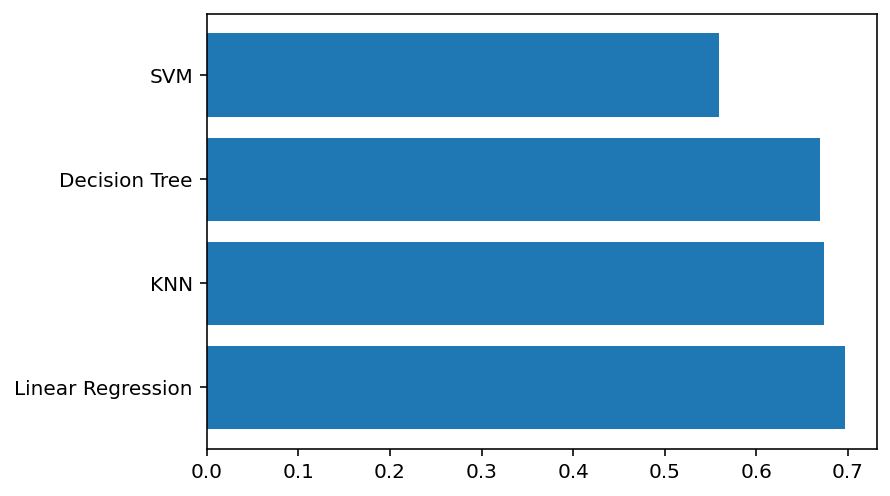

In [35]:
plt.barh(y=list(result), width=result.values())